In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths
import pickle

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

I found 1 face(s) in this photograph.
(53, 176, 115, 114)


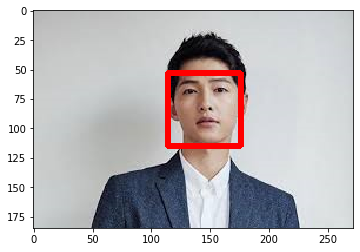

In [2]:
img = cv2.imread("face.jpg")

face_locations = face_recognition.face_locations(img)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    print(face_location)
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

In [3]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [4]:
frame = cv2.imread("face.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

    

Number of faces detected: 1
[(109, 45) (181, 117)]


In [5]:
print(rects[0])
shape = predictor(gray, rects[0])
print(shape)
shape = face_utils.shape_to_np(shape)
print(shape)

[(109, 45) (181, 117)]
[[119  75]
 [120  82]
 [122  88]
 [124  94]
 [126 100]
 [130 105]
 [136 109]
 [142 113]
 [149 113]
 [156 112]
 [162 109]
 [167 104]
 [171  99]
 [173  92]
 [174  86]
 [175  79]
 [176  72]
 [123  65]
 [126  61]
 [131  59]
 [136  59]
 [141  61]
 [148  60]
 [153  58]
 [159  57]
 [164  59]
 [168  62]
 [146  67]
 [146  71]
 [146  76]
 [146  80]
 [142  85]
 [144  86]
 [147  86]
 [149  86]
 [151  85]
 [129  70]
 [131  67]
 [135  67]
 [138  70]
 [135  70]
 [131  71]
 [154  69]
 [156  67]
 [160  66]
 [163  69]
 [160  70]
 [157  70]
 [138  96]
 [141  92]
 [144  90]
 [147  91]
 [149  90]
 [153  92]
 [157  96]
 [154  97]
 [150  99]
 [147  99]
 [144  99]
 [141  98]
 [140  96]
 [144  94]
 [147  94]
 [150  94]
 [156  95]
 [150  95]
 [147  95]
 [144  95]]


<img src=facial_landmarks_68markup-768x619.jpg width=300>

Detection 0: Left: 109 Top: 45 Right: 181 Bottom: 117


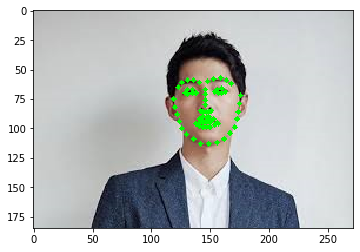

In [6]:
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
imshow('', frame)

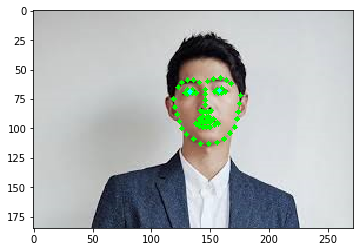

In [7]:
# 36~31

eyel = np.mean(shape[36:42], axis=0)
eyer = np.mean(shape[42:48], axis=0)
cv2.circle(frame, (int(eyel[0]), int(eyel[1])), 2, (255, 255, 0), -1)
cv2.circle(frame, (int(eyer[0]), int(eyer[1])), 2, (255, 255, 0), -1)

imshow("", frame)      

In [8]:
img = face_recognition.load_image_file("face.jpg")
face_encoding = face_recognition.face_encodings(img)
#print(face_encoding)
print(face_encoding[0].shape)

(128,)


In [9]:
files = os.listdir("known")   
    
known_face_encodings = []
known_face_names = []

for filename in files:
            name, ext = os.path.splitext(filename)
            if ext == '.jpg':
                known_face_names.append(name)
                pathname = os.path.join("known", filename)
                img = face_recognition.load_image_file(pathname)
                face_encoding = face_recognition.face_encodings(img)[0]
                known_face_encodings.append(face_encoding) 


In [13]:
print(known_face_names)
print(known_face_encodings[1])

[]


IndexError: list index out of range

In [11]:
test = face_recognition.load_image_file("facetest.jpg")


face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
     distances = face_recognition.face_distance(known_face_encodings, face_encoding)
     print(distances)
     min_value = min(distances)  

     name = "Unknown"
     if min_value < 0.6:
                    index = np.argmin(distances)
                    name = known_face_names[index]
print(name)              

[]


ValueError: min() arg is an empty sequence

In [14]:
imagePaths = list(paths.list_images("known"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        

data = {"encodings": knownEncodings, "names": knownNames}
f = open("known.bin", "wb")
f.write(pickle.dumps(data))
f.close()        

In [15]:
#print(data["encodings"])
#print(data["names"])

print(data["names"][0])
print(data["encodings"][0])

IndexError: list index out of range

In [16]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("songtest.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [17]:
encoding=encodings[0]
matches = face_recognition.compare_faces(data["encodings"], encoding)
print(matches)

matchedIdxs = [i for (i, b) in enumerate(matches) if b]
print(matchedIdxs)

for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
            
name = data["names"][11]
print(data["names"])
print(name)

counts["song"] = 2
counts["obama"] = 1


a = {}
#a["hello"] 
print(a.get("hello", 0))
#a["hello"] = 10


NameError: name 'encodings' is not defined

In [18]:
a = [1,2,3,4]
b = ["a", "b", "c", "d"]

for i in range(len(a)) :
    print(a[i], b[i])
    
for i in zip(a, b) :
    print(i[0], i[1]) 


1 a
2 b
3 c
4 d
1 a
2 b
3 c
4 d


In [19]:
feature = np.array(data["encodings"])
print(feature.shape)

(0,)


In [20]:
import pandas as pd
c = pd.factorize(data["names"])
print(c)
label = c[0]
print(label)

(array([], dtype=int64), array([], dtype=float64))
[]


In [21]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths
import pickle


imagePaths = list(paths.list_images("faces"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        

data = {"encodings": knownEncodings, "names": knownNames}
f = open("known.bin", "wb")
f.write(pickle.dumps(data))
f.close()        